In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('BMW.csv')
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [11]:
df[df['Color']=='Black']['Sales_Volume'].sum()

np.int64(41710693)

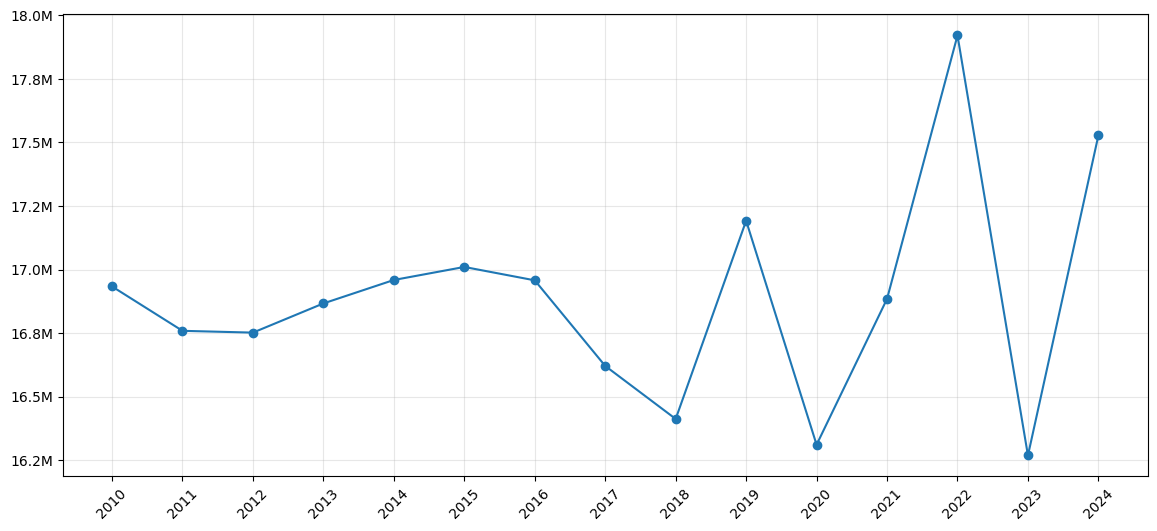

In [32]:
sales_by_year = df.groupby('Year')['Sales_Volume'].sum()
plt.figure(figsize=(14,6))
plt.plot(sales_by_year.index,sales_by_year.values,marker = 'o')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.grid(True,alpha = 0.3)
plt.xticks(sales_by_year.index, rotation=45);
#17-18 год: увеличение ндс, дефицит микрочипов, дефицит полупроводников

In [ ]:
#Аналитика:
#Здесь мы видим несколько точек падения спроса на автомобили.
#1: 2018 г. Здесь мы видим постепенное снижение спроса т.к. в этот период времени наблюдалось несколько проблем: 
#   увеличение ндс,
#   дефицит микрочипов,
#   дефицит полупроводников.
#   кризис с дизельным топливом,
#   конкуренция с китайскими производителями.
#2: 2020 г. Резкое падение спроса из-за глобального локдауна вызванного covid-19.
#3: 2023 г. Территориальные споры нескольких государств, повлекшие за собой глобальный кризис.

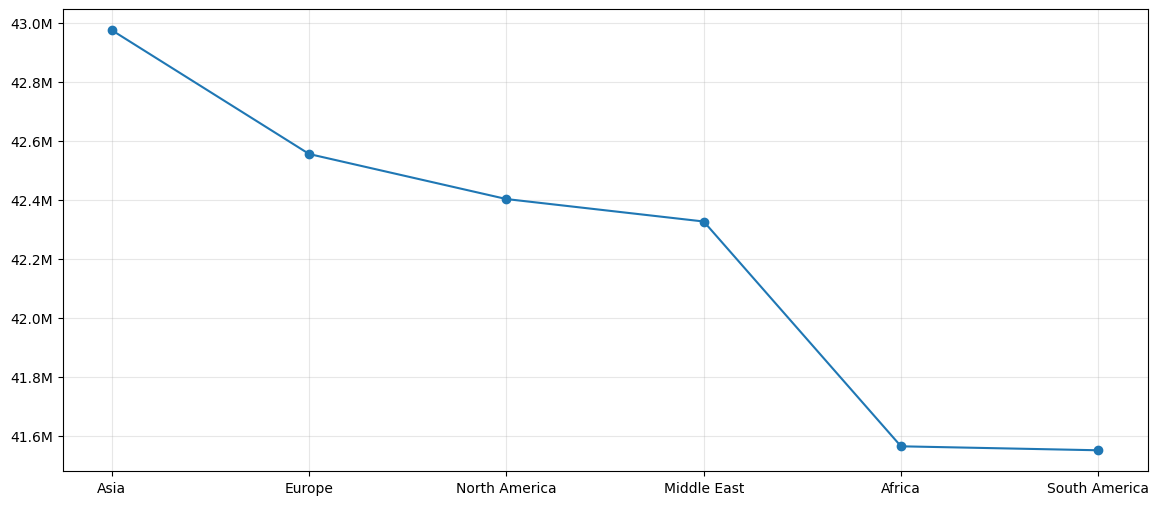

In [34]:
sales_by_country = df.groupby('Region')['Sales_Volume'].sum()
sorted_sales = sales_by_country.sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.plot(sorted_sales.index,sorted_sales.values,marker ='o')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.grid(True,alpha = 0.3)

In [69]:
#Аналитика:
# Наибольшим спросом автомобили BMW пользуются в Азиатском экономическом секторе.
# Наименьший спрос наблюдается в странах Южной Америки.

In [56]:
top_models_per_year = df.groupby(['Year','Model']).agg({'Sales_Volume':'sum'})\
.reset_index().sort_values(['Year', 'Sales_Volume'], ascending=[True, False]).groupby('Year')\
.head(5).reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(top_models_per_year)


,Year,Model,Sales_Volume
0,2010,3 Series,1647769
1,2010,i8,1626565
2,2010,i3,1619401
3,2010,M5,1594989
4,2010,X3,1584432
5,2011,X1,1694495
6,2011,7 Series,1638828
7,2011,M5,1585291
8,2011,5 Series,1552268
9,2011,i8,1548054


In [ ]:
#Аналитика:
# Здесь представлена сводная таблица по top5 моделям по продажам за каждый год.
# Далее будет предоставлен график демонстрирующий спрос на модели
# В дальнейшем планируется добавить аналитику по цветам, возможно присутствует связь между цветом машин и спросом на них в разных регионах.

<Figure size 1600x800 with 0 Axes>

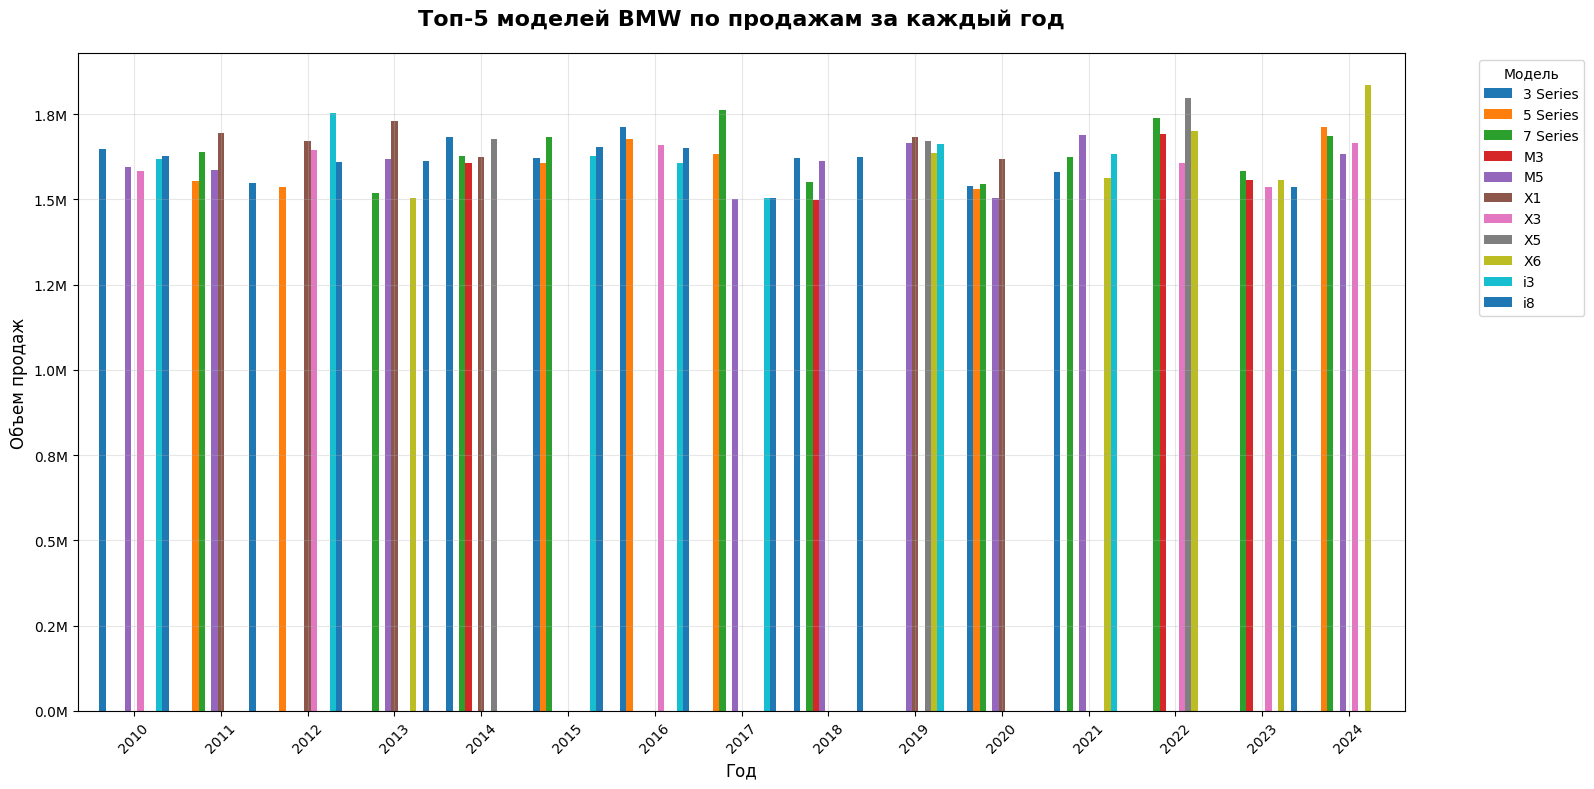

In [66]:
pivot_df = top_models_per_year.pivot(index='Year', columns='Model', values='Sales_Volume')

plt.figure(figsize=(16, 8))
ax = pivot_df.plot(kind='bar', width=0.8, figsize=(16, 8))

plt.title('Топ-5 моделей BMW по продажам за каждый год', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Объем продаж', fontsize=12)
plt.legend(title='Модель', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.grid(True,alpha = 0.3)

plt.tight_layout()
plt.show()